In [1]:
from IPython import display
%matplotlib inline
import gymnasium as gym
import time

In [2]:
from PIL import Image
import numpy as np
def display_image(imageArray):
    display.display(Image.fromarray(np.array(imageArray),'RGB'),clear=True)

In [59]:
NUM_DIZITIZED = 6
def reset(env):
      observation = env.reset()[0]
      s_a_history = [[observation, np.nan]]
      pi = [0.5,0.5]
      return observation, s_a_history, pi
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num + 1)[1:-1]

def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
        np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
        np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
        np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))
    ]
    return sum([x * (NUM_DIZITIZED**i) for i, x in enumerate(digitized)])

def get_action(s,Q,epsilon, pi=[0.5,0.5]):
    state = digitize_state(s)
    if np.random.rand() < epsilon:
        action = np.random.choice([0,1])
    else:
        action = np.argmax(Q[state])
    return action

def Q_learning(s, a, r, s_next, Q, eta, gamma, is_terminated):
    s = digitize_state(s)
    s_next = digitize_state(s_next)
    if is_terminated:
        Q[s, a] = Q[s, a] + eta * (r- Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    return Q

def run_once(env, s_a_history,initial_observation, Q, epsilon, eta, gamma, pi, show=False):
    observation = initial_observation
    s = observation
    a = get_action(s, Q, epsilon, pi)
    a_next = a
    count = 0;
    while True:
        is_terminated = False
        if show:
            time.sleep(0.01)
            img = env.render()
            display_image(img)
        a = a_next
        s_a_history[-1][1] = a
        s_next, reward, terminated, truncated, info = env.step(a)
        s_a_history.append([s_next, np.nan])
        if count > 500:
            r = 1
            a_next = np.nan
            is_terminated = True
        elif count < 500 and terminated:
            r = -1
            a_next = np.nan
            is_terminated = True
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma, is_terminated)
        if is_terminated:
            if show:
                time.sleep(0.01)
                img = env.render()
                display_image(img)
            break
        else:
            s = s_next
        count += 1
    return [s_a_history, Q]

In [60]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
eta = 0.1
gamma = 0.9
epsilon = 0.5
Q = np.random.rand(NUM_DIZITIZED**4,2)
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1
env.reset()
while is_continue:
    observation, s_a_history, pi = reset(env)
    print('episode: ' + str(episode))
    epsilon = epsilon / 2
    [s_a_history, Q] = run_once(env, s_a_history, observation, Q, epsilon, eta, gamma, pi,show=False)
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    episode = episode + 1
    if episode > 20000:
        break
env.close()

episode: 1
0.39153135978070897
episode: 2
0.5926615996179225
episode: 3
0.2518029046593522
episode: 4
0.42920472959815004
episode: 5
0.5468190707076559
episode: 6
0.35040813447207014
episode: 7
0.07295995615408335
episode: 8
0.333570233163674
episode: 9
0.2703877154828453
episode: 10
0.1892547215942531
episode: 11
0.38690830821722444
episode: 12
0.1983627878444405
episode: 13
0.2424652408135005
episode: 14
0.40800778668055737
episode: 15
0.4450596294748717
episode: 16
0.1803213900287467
episode: 17
0.28026157033510124
episode: 18
0.1229988397416559
episode: 19
0.17898245111540814
episode: 20
0.30479549285231744
episode: 21
0.6468003873343763
episode: 22
0.2230691419859892
episode: 23
0.3800166514433351
episode: 24
0.153332249743031
episode: 25
0.48012319900054584
episode: 26
0.14637368455077665
episode: 27
0.598630407184413
episode: 28
0.3924417536274222
episode: 29
0.23202725779953576
episode: 30
0.26637787439911265
episode: 31
0.17639085792318215
episode: 32
0.2520820407201628
episod

d:\miniconda3\Lib\site-packages\gymnasium\envs\classic_control\cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


0.19120128763924515
episode: 975
0.1653339567740124
episode: 976
0.10470281005114007
episode: 977
0.1439140882397901
episode: 978
0.1146388372073843
episode: 979
0.23666828987246236
episode: 980
0.10377765332271575
episode: 981
0.1509934370697703
episode: 982
0.24103591926876655
episode: 983
0.3395139502548601
episode: 984
0.3338453510631915
episode: 985
0.2995202020056099
episode: 986
0.048904810967717136
episode: 987
0.1707983269419484
episode: 988
0.21098401354177332
episode: 989
0.1623314141961303
episode: 990
0.16365343634543186
episode: 991
0.14390382534809112
episode: 992
0.20934804515758063
episode: 993
0.2100432676816309
episode: 994
0.3060224816049266
episode: 995
0.3764009052745654
episode: 996
0.58293682446489
episode: 997
0.07954044731408935
episode: 998
0.2070639054177097
episode: 999
0.1641421200855686
episode: 1000
0.41601219029086073
episode: 1001
0.3040707692016167
episode: 1002
0.22210592265211296
episode: 1003
0.16722552939905194
episode: 1004
0.3096031167967952
epi

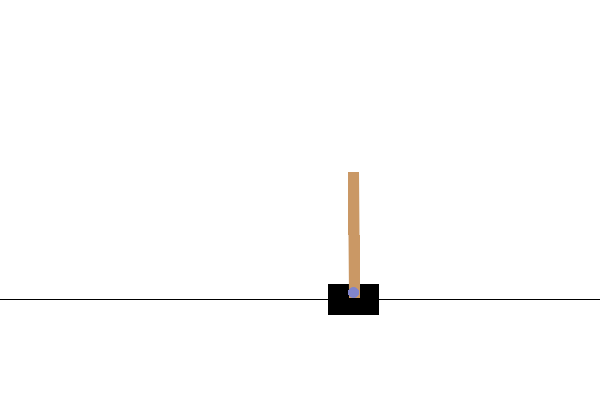

[[[array([ 0.0419418 , -0.03456875, -0.01695187, -0.03389785], dtype=float32),
   0],
  [array([ 0.04125043, -0.22944355, -0.01762983,  0.25338873], dtype=float32),
   0],
  [array([ 0.03666155, -0.4243094 , -0.01256206,  0.54045916], dtype=float32),
   0],
  [array([ 0.02817537, -0.61925256, -0.00175287,  0.82915765], dtype=float32),
   1],
  [array([ 0.01579032, -0.42410666,  0.01483028,  0.53592396], dtype=float32),
   1],
  [array([ 0.00730818, -0.22919635,  0.02554876,  0.24795058], dtype=float32),
   1],
  [array([ 0.00272425, -0.03444842,  0.03050777, -0.03656546], dtype=float32),
   1],
  [array([ 0.00203529,  0.16022307,  0.02977646, -0.31946892], dtype=float32),
   1],
  [array([ 0.00523975,  0.3549086 ,  0.02338709, -0.6026147 ], dtype=float32),
   1],
  [array([ 0.01233792,  0.54969573,  0.01133479, -0.8878404 ], dtype=float32),
   0],
  [array([ 0.02333183,  0.3544218 , -0.00642202, -0.5916159 ], dtype=float32),
   0],
  [array([ 0.03042027,  0.15939033, -0.01825434, -0.30

In [65]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env.reset()
observation, s_a_history, pi = reset(env)
run_once(env, s_a_history, observation, Q, 0, eta, gamma, pi,show=True)